In [1]:
#coding: utf-8

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#读取Excel数据
filefullpath = r"C:\Users\lenovo\Desktop\机器学习与数据挖掘\01ForVisual.xlsx"
data = pd.read_excel(filefullpath)
df = data.loc[:, ['ELEMENTS', 'T_MAX', 'T_AVE', 'RH_MIN', 'PRECIPIT', 'SOLAR', 'Cl', 'SO2', 'Vcorr']].copy()
#include 它接受的是一个数字，代表着要选择数据的位置；loc接受标签的索引
#读取数据特征
df.describe()

,ELEMENTS,T_MAX,T_AVE,RH_MIN,PRECIPIT,SOLAR,Cl,SO2,Vcorr
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,2.367471,34.321839,17.961494,39.214943,1631.132184,5476.270115,28.830345,3.531782,0.034970
std,1.991431,1.743940,4.199953,11.876820,328.105414,682.028865,20.002548,1.160495,0.035349
min,0.030000,31.300000,14.200000,16.800000,1103.000000,4183.000000,2.050000,1.800000,0.000300
25%,1.100000,32.800000,14.700000,28.400000,1367.000000,5111.000000,2.800000,2.430000,0.010025
50%,2.000000,33.950000,15.300000,40.300000,1558.500000,5229.000000,32.715000,3.315000,0.021911
75%,2.390000,36.400000,23.800000,50.000000,1899.000000,5744.000000,47.900000,4.400000,0.047425
max,9.200000,37.400000,24.000000,58.000000,2321.000000,6619.000000,55.400000,6.100000,0.199500


In [3]:
df.shape

(522, 9)

In [4]:
# 划分训练、测试数据集
from sklearn.model_selection import train_test_split
TrainData, TestData = train_test_split(df, test_size=0.2)

In [5]:
# 划分输入和输出数据集
Train_X = TrainData.iloc[:, 0:8].copy()
Train_y = TrainData.iloc[:, 8].copy()
Test_X = TestData.iloc[:, 0:8].copy()
Test_y = TestData.iloc[:, 8].copy()

In [6]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=10)
model.fit(Train_X, Train_y)

RandomForestRegressor(random_state=10)

In [7]:
Train_pred = model.predict(Train_X)  #预测结果

In [8]:
#均方误差 (Mean squared error)
from sklearn.metrics import mean_squared_error
mean_squared_error(Train_y, Train_pred)

5.06141595495775e-05

In [9]:
#求R方值
from sklearn.metrics import r2_score
r2_score(Train_y, Train_pred)

0.9604454121162147

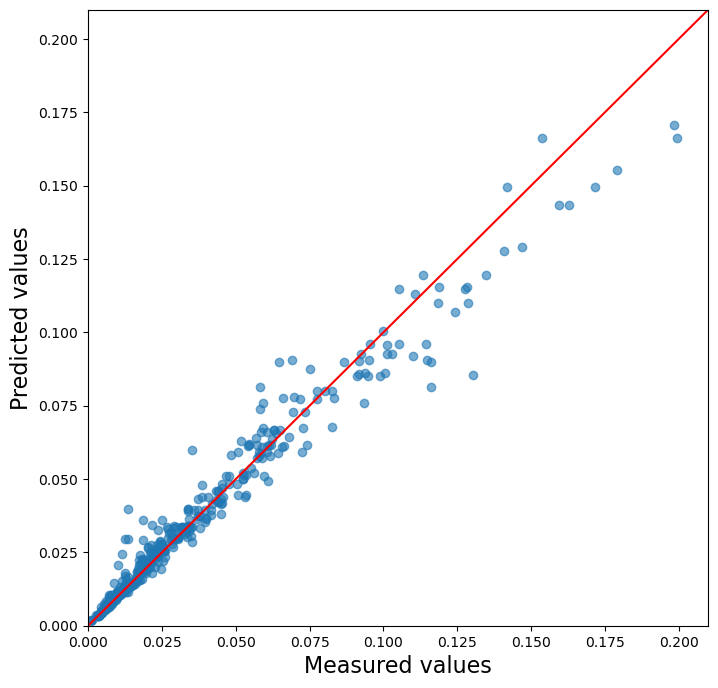

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(Train_y, Train_pred, alpha=0.6)
plt.plot([0, 0.21], [0, 0.21], "r-")
plt.xlabel('Measured values', fontsize=16)
plt.ylabel('Predicted values', fontsize=16)
plt.xlim(0, 0.21)
plt.ylim(0, 0.21)
plt.show()

In [11]:
Test_pred = model.predict(Test_X) #求得测试集样品的腐蚀速率预测值

In [12]:
#均方误差 (Mean squared error)
mean_squared_error(Test_y, Test_pred)

0.00016923885351499143

In [13]:
#求R方值
r2_score(Test_y, Test_pred)

0.8467051621302093

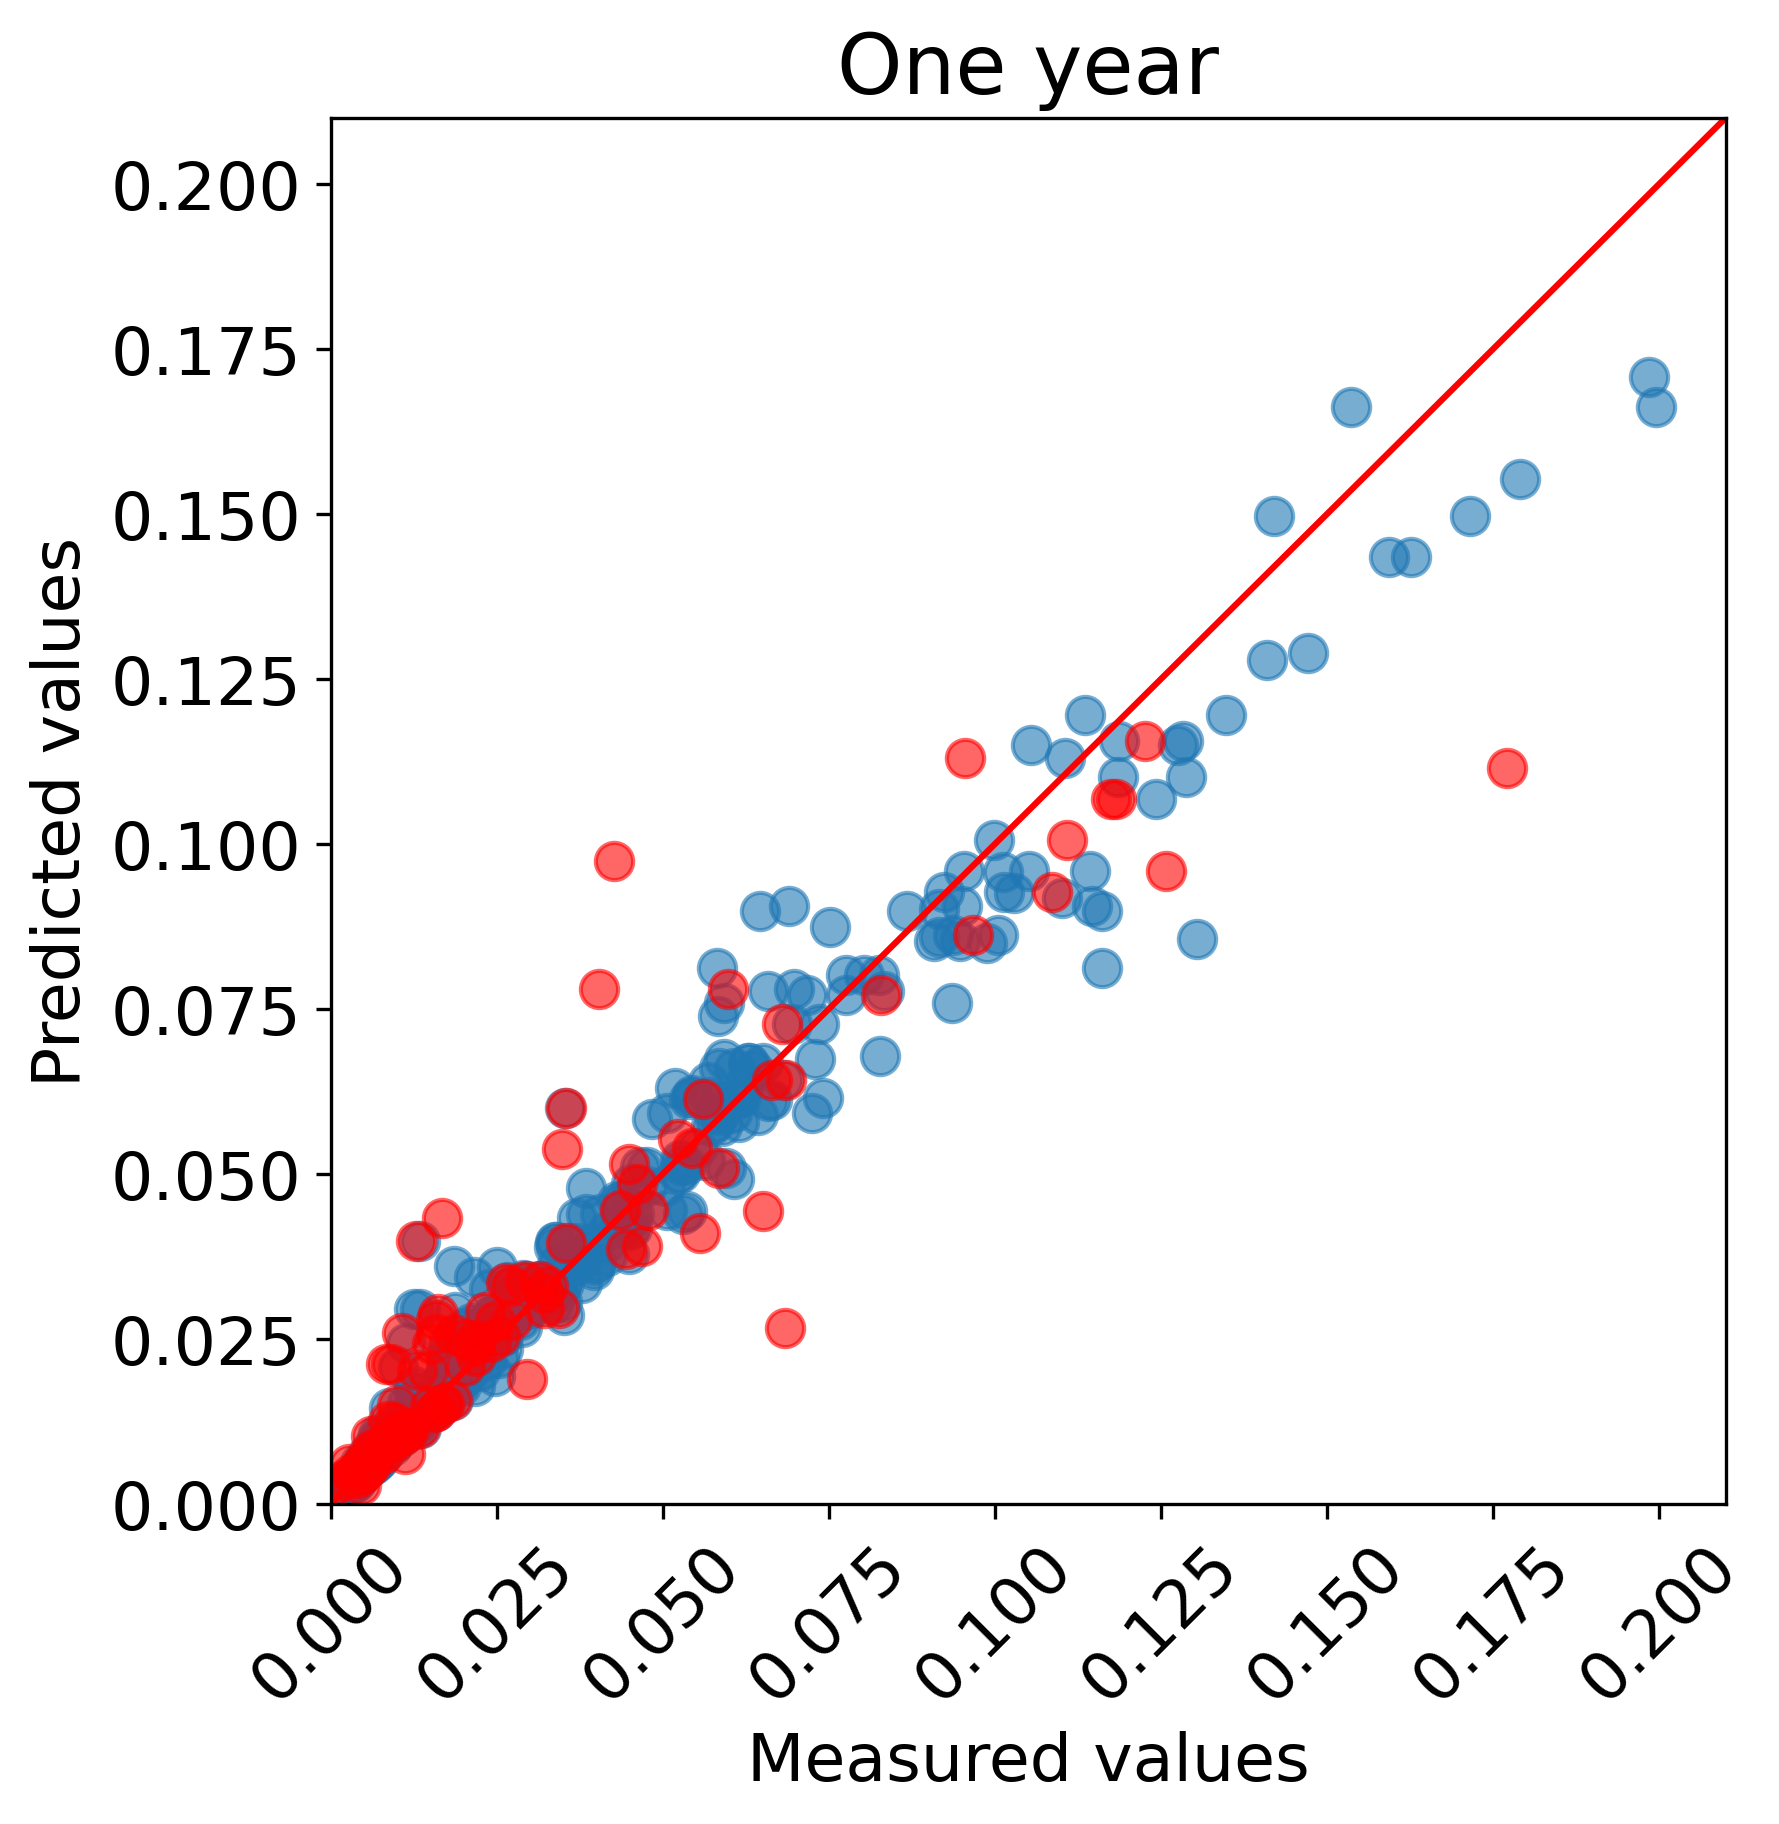

In [14]:
plt.figure(figsize=(6, 6), dpi=300)
plt.scatter(Train_y, Train_pred, s=80, alpha=0.6)
plt.scatter(Test_y, Test_pred, s=80, c='r', alpha=0.6)
plt.plot([0, 0.21], [0, 0.21], "r-")

plt.xlabel('Measured values', fontsize=16)
plt.ylabel('Predicted values', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 0.21)
plt.ylim(0, 0.21)
plt.xticks(rotation=45)
plt.title('One year', fontsize=20)
plt.show()

In [15]:
X = df.iloc[:, 0:8].copy()
y = df.iloc[:, 8].copy()

# 首先需要定义模型（例如随机森林）
from sklearn.ensemble import RandomForestRegressor  # 根据问题类型选择回归或分类
model = RandomForestRegressor()  # 初始化模型

def RFFeaImpor_(X_data, y_data):
    model.fit(X_data, y_data)
    # 修正1：Columns → columns（小写）
    result_ = {
        'var': X_data.columns.values,  # 正确的列名属性是columns
        'feature_importances_': model.feature_importances_
    }
    feature_importances_ = pd.DataFrame(result_, columns=['var', 'feature_importances_'])
    # 修正2：feature_importances → feature_importances_（补全下划线）
    feature_importances_ = feature_importances_.sort_values('feature_importances_', ascending=False)
    return feature_importances_

feature_importances_ = RFFeaImpor_(X, y)
print(feature_importances_)

        var  feature_importances_
0  ELEMENTS              0.318282
6        Cl              0.281690
3    RH_MIN              0.153287
4  PRECIPIT              0.065693
2     T_AVE              0.063196
5     SOLAR              0.051942
7       SO2              0.040066
1     T_MAX              0.025845


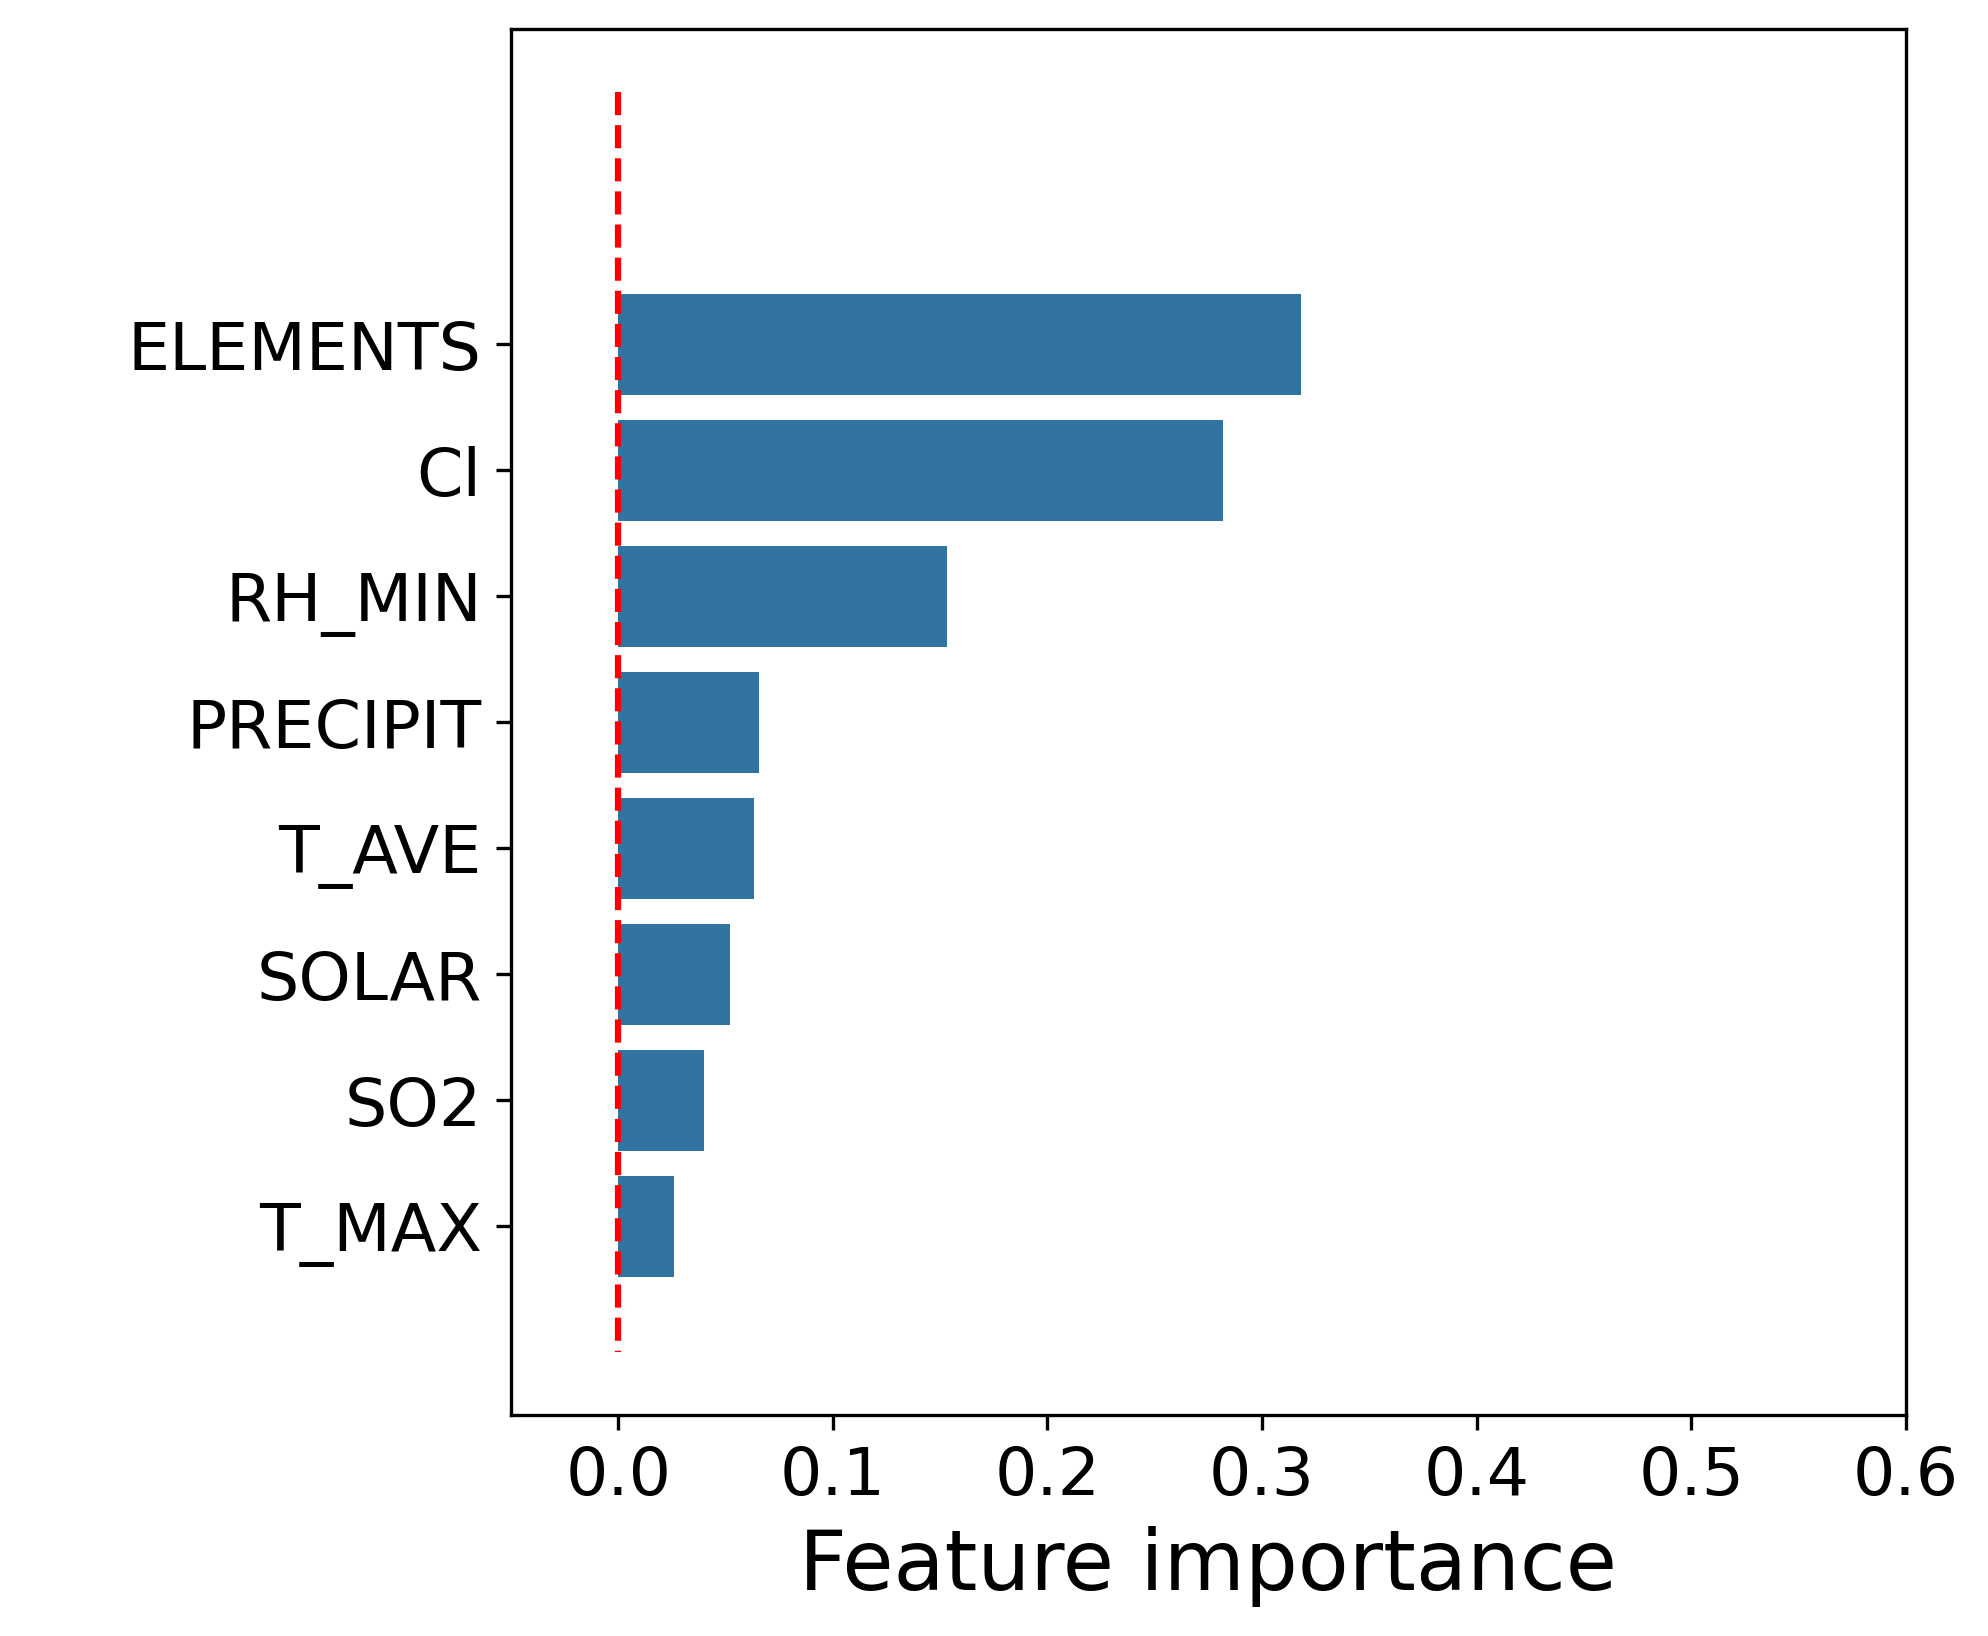

In [24]:
plt.figure(figsize=(6, 6), dpi=300)
# 显式指定x和y参数
sns.barplot(
    x=feature_importances_['feature_importances_'], 
    y=feature_importances_['var']
)
plt.plot([0, 0], [-2, 8], "r--")
plt.xlabel('Feature importance', fontsize=20)
plt.ylabel(' ', fontsize=20)  # 可以留空或填写特征名称，如'Features'
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim((-0.05, 0.6))
plt.show()

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
# 使用新的损失函数名称 'squared_error'（替代旧版的 'ls'）
model = GradientBoostingRegressor(loss='squared_error')
model.fit(Train_X, Train_y)

GradientBoostingRegressor()